# Emoji

Emoji are pictographs (pictorial symbols) that are typically presented in a colorful form and used inline in text. They represent things such as faces, weather, vehicles and buildings, food and drink, animals and plants, or icons that represent emotions, feelings, or activities. The entire set of official Emoji codes as defined by the unicode consortium (http://www.unicode.org/emoji/charts/full-emoji-list.html) can be accessed after installing the package emoji.

In [75]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
import re
import string

# Read csv file
df0 = pd.read_csv('tweets_public3.csv', encoding='utf-16', index_col='tweet_id', sep=',')
# Keep relevant columns only
df = df0.drop(['retweet_count','is_reply','reply_count','tweet_coord','tweet_location','user_timezone'], axis=1)
df.head()

,tweet_created,airline_sentiment,text,newairline_sentiment
tweet_id,,,,
942743012337123328,Mon Dec 18 13:07:04 +0000 2017,positive,"""Los pilotos de Ryanair desconvocan la huelga ...",positive
926857871916183553,Sat Nov 04 17:05:11 +0000 2017,positive,"@Iberia @lavecinarubia Si ,por favor las decla...",positive
936979305720090626,Sat Dec 02 15:24:09 +0000 2017,neutral,@Iberia Me dirías por favor que costo tiene?,neutral
943983853802328064,Thu Dec 21 23:17:43 +0000 2017,negative,"@SupermanlopezN @Iberia @giroditalia Champion,...",negative
938207464457211904,Wed Dec 06 00:44:25 +0000 2017,negative,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,negative


In [76]:
from emoji import UNICODE_EMOJI #pip install emoji
print(UNICODE_EMOJI.values())

dict_values([':1st_place_medal:', ':2nd_place_medal:', ':3rd_place_medal:', ':AB_button_(blood_type):', ':ATM_sign:', ':A_button_(blood_type):', ':Afghanistan:', ':Albania:', ':Algeria:', ':American_Samoa:', ':Andorra:', ':Angola:', ':Anguilla:', ':Antarctica:', ':Antigua_&_Barbuda:', ':Aquarius:', ':Argentina:', ':Aries:', ':Armenia:', ':Aruba:', ':Ascension_Island:', ':Australia:', ':Austria:', ':Azerbaijan:', ':BACK_arrow:', ':B_button_(blood_type):', ':Bahamas:', ':Bahrain:', ':Bangladesh:', ':Barbados:', ':Belarus:', ':Belgium:', ':Belize:', ':Benin:', ':Bermuda:', ':Bhutan:', ':Bolivia:', ':Bosnia_&_Herzegovina:', ':Botswana:', ':Bouvet_Island:', ':Brazil:', ':British_Indian_Ocean_Territory:', ':British_Virgin_Islands:', ':Brunei:', ':Bulgaria:', ':Burkina_Faso:', ':Burundi:', ':CL_button:', ':COOL_button:', ':Cambodia:', ':Cameroon:', ':Canada:', ':Canary_Islands:', ':Cancer:', ':Cape_Verde:', ':Capricorn:', ':Caribbean_Netherlands:', ':Cayman_Islands:', ':Central_African_Republ

We select from the dictionary of UNICODE emojis those clearly associated with positive or negative emotions. We took:
https://unicode.org/emoji/charts/full-emoji-list.html
as a reference. Those associated with negative emotions have shortnames with words such as *fear*, *worried*, *frown*, *cry*, *scream*, etc. While those associated with positive emotions have shortnames containing words such as *grin*, *joy*, *smile*, *OK*, *thumbs up*, etc
We identify the list of positive/negative emoji shortnames using regular expressions.


In [77]:
def get_emoji(patterns,thelist):
    elist = []
    for pattern in patterns:
        for emoji in thelist:
            match = re.search(pattern,emoji)
            if match: elist.append(emoji)
    return elist

# List of UNICODE emojis
unicodeemojilist = list(UNICODE_EMOJI.values())

# Regular expressions to cast negative emojis
negative_patterns = [re.compile(r'.*frown.*(face)'),re.compile(r'confounded'),re.compile(r'disappoint'),
                     re.compile(r'worried'),re.compile(r'crying'),re.compile(r'\bang[er][ry]'),re.compile(r'fear'),
                     re.compile(r'weary'),re.compile(r'exploding_face'),re.compile(r'grimacing'),
                     re.compile(r'face_with_steam_from_nose'),re.compile(r'pouting_face'),re.compile(r'sleepy_face'),
                     re.compile(r'downcast_face_with_sweat'),re.compile(r'unamused_face'),
                     re.compile(r'see-no-evil_monkey'),re.compile(r'pensive_face'),re.compile(r'persevering_face'),
                     re.compile(r'anxi'),re.compile(r'scream'),re.compile(r'hot_face'),re.compile(r'flushed'),
                     re.compile(r'zany_face'),re.compile(r'dizzy.*(face)'),re.compile(r'face_with_symbols_on_mouth'),
                     re.compile(r'thumbs_down:'),re.compile(r'middle_finger:'),re.compile(r'broken_heart')]
# Regular expressions to cast positive emojis
positive_patterns = [re.compile(r'grin'),re.compile(r'joy'),re.compile(r'smil'),re.compile(r'kiss:'),re.compile(r'wink'),
           re.compile(r'savoring_food'),re.compile(r'[^broken|couple_with]\wheart'),re.compile(r'thumbs_up:'),
           re.compile(r'OK_hand:'),re.compile(r'clapping_hands:'),re.compile(r'waving_hand:'),
           re.compile(r'raised_hand:'),re.compile(r':relieved_face')]    
                
# List of negative/positive emojis shortnames
negative_emoji_shortname = get_emoji(negative_patterns,unicodeemojilist)
positive_emoji_shortname = get_emoji(positive_patterns,unicodeemojilist)

print(positive_emoji_shortname)

[':grinning_cat_face:', ':grinning_cat_face_with_smiling_eyes:', ':grinning_face:', ':grinning_face_with_big_eyes:', ':grinning_face_with_smiling_eyes:', ':grinning_face_with_sweat:', ':grinning_squinting_face:', ':cat_face_with_tears_of_joy:', ':face_with_tears_of_joy:', ':joystick:', ':beaming_face_with_smiling_eyes:', ':cat_face_with_wry_smile:', ':grinning_cat_face_with_smiling_eyes:', ':grinning_face_with_smiling_eyes:', ':kissing_face_with_smiling_eyes:', ':slightly_smiling_face:', ':smiling_cat_face_with_heart-eyes:', ':smiling_face:', ':smiling_face_with_halo:', ':smiling_face_with_heart-eyes:', ':smiling_face_with_horns:', ':smiling_face_with_smiling_eyes:', ':smiling_face_with_sunglasses:', ':face_blowing_a_kiss:', ':kiss:', ':winking_face:', ':winking_face_with_tongue:', ':face_savoring_food:', ':beating_heart:', ':growing_heart:', ':heavy_heart_exclamation:', ':red_heart:', ':revolving_hearts:', ':sparkling_heart:', ':thumbs_up:', ':OK_hand:', ':clapping_hands:', ':waving_h

We extract the unicode emojis from their shortnames.

In [78]:
def get_emoji(mydict,emojiShortname):
    return list(mydict.keys())[list(mydict.values()).index(emojiShortname)]

# List of negative/positive emojis
nlist = []
for emoji in negative_emoji_shortname:
    nlist.append(get_emoji(UNICODE_EMOJI,emoji)) 
plist = []
for emoji in positive_emoji_shortname:
    plist.append(get_emoji(UNICODE_EMOJI,emoji)) 

In [79]:
elist = nlist+plist
print(elist)

['☹', '😦', '🙁', '😖', '😞', '😟', '😿', '😢', '😭', '💢', '😠', '👿', '😱', '😨', '🙀', '😩', '😬', '😤', '😡', '😪', '😓', '😒', '🙈', '😔', '😣', '😰', '😱', '😳', '\U0001f92a', '😵', '\U0001f92c', '👎', '🖕', '💔', '😺', '😸', '😀', '😃', '😄', '😅', '😆', '😹', '😂', '🕹', '😁', '😼', '😸', '😄', '😙', '🙂', '😻', '☺', '😇', '😍', '😈', '😊', '😎', '😘', '💏', '😉', '😜', '😋', '💓', '💗', '❣', '❤', '💞', '💖', '👍', '👌', '👏', '👋', '✋', '😌']


In [80]:
def get_emoji(tweet): 
    inemoji = []
    for emoji in elist:
        match = tweet.find(emoji)
        if match != -1: 
            inemoji.append(emoji)
    return inemoji 

df['emojis'] = df['text'].apply(get_emoji)

In [81]:
def num_emoji(tweet,emojilist):
    inemoji = []
    for emoji in emojilist:
        match = tweet.find(emoji)
        if match != -1: inemoji.append(emoji)
    return len(inemoji) 

df['emopos'] = df['text'].apply(num_emoji,emojilist=plist)
df['emoneg'] = df['text'].apply(num_emoji,emojilist=nlist)
df.head()

,tweet_created,airline_sentiment,text,newairline_sentiment,emojis,emopos,emoneg
tweet_id,,,,,,,
942743012337123328,Mon Dec 18 13:07:04 +0000 2017,positive,"""Los pilotos de Ryanair desconvocan la huelga ...",positive,[],0,0
926857871916183553,Sat Nov 04 17:05:11 +0000 2017,positive,"@Iberia @lavecinarubia Si ,por favor las decla...",positive,[],0,0
936979305720090626,Sat Dec 02 15:24:09 +0000 2017,neutral,@Iberia Me dirías por favor que costo tiene?,neutral,[],0,0
943983853802328064,Thu Dec 21 23:17:43 +0000 2017,negative,"@SupermanlopezN @Iberia @giroditalia Champion,...",negative,[],0,0
938207464457211904,Wed Dec 06 00:44:25 +0000 2017,negative,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,negative,[😤],0,1


Let's check some tweet examples:

In [82]:
tweet = df.loc[946415752038535168]
print(tweet)

tweet_created                              Thu Dec 28 16:21:13 +0000 2017
airline_sentiment                                                 neutral
text                    ¡Fue espectacular! 👍🏼😉 RT @Iberia: Ahora que y...
newairline_sentiment                                              neutral
emojis                                                             [😉, 👍]
emopos                                                                  2
emoneg                                                                  0
Name: 946415752038535168, dtype: object


In [83]:
tweet = df.loc[947128934705123335] #927259106674651136] #
print(tweet)

tweet_created                              Sat Dec 30 15:35:09 +0000 2017
airline_sentiment                                                negative
text                    @Iberia felicitando las Pascuas 😠 https://t.co...
newairline_sentiment                                             negative
emojis                                                                [😠]
emopos                                                                  0
emoneg                                                                  1
Name: 947128934705123335, dtype: object


Using emoticons we were able to identify 70 aprox. According to this article (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4671607/) about 4% of tweets in Twitter contain emojis. 4% of 6813 tweets would be about ~272 for our sample.

In [84]:
df['emoneg'].sum()+ df['emoneg'].sum()

280

In [85]:
# Create a new column with the sum of emopos and emoneg
df['sum_emoji'] = df['emopos'] + df['emoneg']
# Select only tweets with emoji
dfEmoji = df[df.sum_emoji >= 1]

In [86]:
# Check the dataset of tweet containing emoji
dfEmoji

,tweet_created,airline_sentiment,text,newairline_sentiment,emojis,emopos,emoneg,sum_emoji
tweet_id,,,,,,,,
938207464457211904,Wed Dec 06 00:44:25 +0000 2017,negative,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,negative,[😤],0,1,1
924989371480240128,Mon Oct 30 13:20:26 +0000 2017,neutral,@AlvProdz La A de... 😂😂😂 https://t.co/CmZuDTHQjz,neutral,[😂],1,0,1
941366647897681922,Thu Dec 14 17:57:53 +0000 2017,positive,90 años 🎂\nMuchos vuelos 🛫\n¡Muchas felicidade...,positive,[😉],1,0,1
930607170277773312,Wed Nov 15 01:23:33 +0000 2017,negative,@Iberia @Iberia ya gané? 😓,negative,[😓],0,1,1
935513720587014144,Tue Nov 28 14:20:26 +0000 2017,negative,@rafallopz @Iberia Yo viajo con Iberia en ener...,negative,"[😨, 😓]",0,2,2
941315427547992064,Thu Dec 14 14:34:21 +0000 2017,negative,@Iberia @WavesANDWind Decidme por favor que te...,negative,[😞],0,1,1
937121508744409088,Sun Dec 03 00:49:13 +0000 2017,positive,"2 meses y empiezo a trabajar con Iberia, que r...",positive,[❤],1,0,1
927652461246058497,Mon Nov 06 21:42:36 +0000 2017,neutral,@Iberia #HolaArgentina ¡Que nerviosssss y que ...,neutral,"[😍, ❤]",2,0,2
942463033024090112,Sun Dec 17 18:34:31 +0000 2017,negative,"Como no pueda volar esta Navidad, me acordaré ...",negative,[😒],0,1,1


In [87]:
# Dataset of tweets containing only positive emoji
dfOnlyPositive = dfEmoji[dfEmoji['emoneg'] == 0]

print('Number of tweets with only positive emoji:',dfOnlyPositive['emopos'].count())
counts = dfOnlyPositive['newairline_sentiment'].value_counts()/(dfOnlyPositive['emopos'].count())
print(counts)

Number of tweets with only positive emoji: 253
positive    0.422925
neutral     0.383399
negative    0.193676
Name: newairline_sentiment, dtype: float64


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


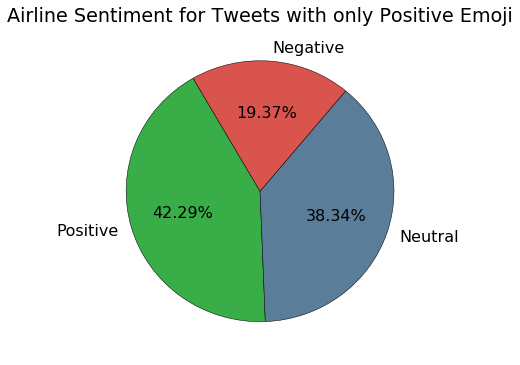

In [88]:
# Plot
rcParams['font.size'] = 16.0
matplotlib.rcParams['lines.linewidth'] = 7
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "League Gothic"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

plt.title('Airline Sentiment for Tweets with only Positive Emoji')
plt.pie(counts,labels=['Positive','Neutral','Negative'],
       colors=[sns.xkcd_rgb["medium green"],sns.xkcd_rgb["steel blue"],sns.xkcd_rgb["pale red"]],
       labeldistance=1.1,startangle=120,
        shadow=False,autopct='%.2f%%',
        wedgeprops={"edgecolor":"k",'linewidth': 0.5, 'linestyle': 'solid', 'antialiased': True})
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('piechartEMOPOS.jpg', bbox_inches='tight',dpi=300)

Tweets with positive emojis with negative sentiment labels??? Let's check the list of tweets in this category... By inspecting the text we find sarcasm and some mislabeling.

In [89]:
dfOnlyPositive[dfOnlyPositive['newairline_sentiment'] == 'negative'].text.tolist()

['@ILopezMunoz @josue112014 @jmanatol @AlexValeroLEVC @airspottersORG @Ryanair No es por vacilar pero tiene toda la pinta de ser un vueling 😂',
 'En el aniversario de la pérdida de mi maleta @Iberia ¿Me váis a hacer un regalo? 😊 Solo falta 1 mes!! Qué emoción!',
 'Muchas gracias por las 2h de retraso en Vigo @Ryanair 👌',
 'Oye que el domingo cojo yo un avion😅 guardarme alguno no???😂😇 https://t.co/i4R6LoAZ46',
 '😂😂😂 qué paveros los de @Ryanair! #siempreMejorando dicen, mientras siguen en su escalada de monopolizar y restar se… https://t.co/5mp7s5709I',
 '@Jonas_bornes00 @Javierromero_00 @Iberia @Ryanair Creo q igual ryanair por ahorrarse dinero en un piloto te dejaría pilotar 😂😂',
 '@jordibatlle @Iberia Después 1h30’ no está mal ¿No? Me consolaré pensando en que al menos han acabado saliendo 😉',
 "El segundo flaquito que dice 'hola' de la publicidad de Iberia, está que se parte. Sorry, lo tenia q decir. 😇",
 'Unos cuantos meses y empiezo a facturar con Iberia❤💸🛫',
 '@AnaAngiolina @ostin

Number of tweets with only negative emoji: 118
negative    0.762712
neutral     0.161017
positive    0.076271
Name: newairline_sentiment, dtype: float64


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


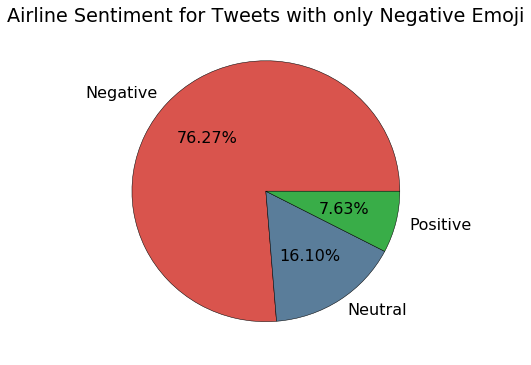

In [90]:
# Dataset of tweets containing only negative emoji
dfOnlyNegative = dfEmoji[dfEmoji['emopos'] == 0]
print('Number of tweets with only negative emoji:',dfOnlyNegative['emoneg'].count())
counts = dfOnlyNegative['newairline_sentiment'].value_counts()/(dfOnlyNegative['emoneg'].count())
print(counts)

#Plot
plt.title('Airline Sentiment for Tweets with only Negative Emoji')
plt.pie(counts,labels=['Negative','Neutral','Positive'],
        colors=[sns.xkcd_rgb["pale red"],sns.xkcd_rgb["steel blue"],sns.xkcd_rgb["medium green"]],
        labeldistance=1.1,startangle=0,
        shadow=False,autopct='%.2f%%',
        wedgeprops={"edgecolor":"k",'linewidth': 0.5, 'linestyle': 'solid', 'antialiased': True}) 
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('piechartEMONEG.jpg', bbox_inches='tight',dpi=300)

In [91]:
dfOnlyNegative[dfOnlyNegative['newairline_sentiment'] == 'positive'].text.tolist()

['Vuelos de Ryanair a 5€ y... 🙈🙈🙈',
 'Este domingo volví de Madrid a Málaga en uno de los nuevos aviones de @Iberia y de vuelo no fue más de media hora 😬#quégenial',
 'Veo los carteles de iberia y me dan ganas de viajar de nuevo 💔',
 'Me quiero ir a Amsterdam con las ofertas de ryanair😭😭😭',
 'Con mucho hype de ir a Copenhague 🤔 \nRyanair y sus ofertazas me vuelven loca y pobre 😱😱',
 '@Ryanair_ES @Ryanair Me encanta viajar y a mi pareja también... y aún no tengo regalo de reyes...y me sacarías del apuro #Ryanair 😓',
 '@AdQqV @Ryanair Dios! Que precios mas alucinantes! 😱',
 'Me gustaría hacer prácticas en Iberia pero no tengo tiempo 😭😭',
 'Creo que después de tanto viajar con vosotros me estoy ganando el carné VIP a pulso @Ryanair 🙈✈️🙄']

In [92]:
# Dataset of tweets containing both positive and negative emoji
dfBoth = dfEmoji[(dfEmoji['emopos'] >= 1) & (dfEmoji['emoneg'] >= 1)]
dfBoth

,tweet_created,airline_sentiment,text,newairline_sentiment,emojis,emopos,emoneg,sum_emoji
tweet_id,,,,,,,,
930595880432013312,Wed Nov 15 00:38:42 +0000 2017,negative,El viaje más largo que he tenido ha sido desde...,negative,"[💔, 😂]",1,1,2
938064372898856962,Tue Dec 05 15:15:49 +0000 2017,negative,Llevo una hora esperando al teléfono. \n@Iberi...,negative,"[😱, 😱, 👋]",1,2,3
938124560855175170,Tue Dec 05 19:14:59 +0000 2017,negative,@aaruiz07 Que Iberia había aumentado sus vuelo...,negative,"[🙈, 😂]",1,1,2
930123340987158529,Mon Nov 13 17:21:00 +0000 2017,negative,@SokingRcQ Pero como vas con Iberia mi niñoooo...,negative,"[😒, 😂]",1,1,2
940976621040873473,Wed Dec 13 16:08:03 +0000 2017,negative,@luisangelmate @Iberia No fallan! Es #Iberia e...,negative,"[👎, 😂]",1,1,2
933627331872161792,Thu Nov 23 09:24:36 +0000 2017,neutral,@jupa_torres @VivaAerobus @Ryanair No se nos o...,neutral,"[😱, 😱, 😍]",1,2,3


Number of tweets with BOTH positive and negative emoji: 6
negative    0.833333
neutral     0.166667
Name: newairline_sentiment, dtype: float64


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


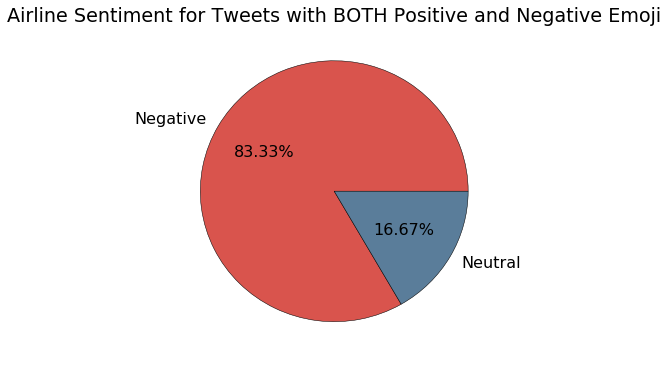

In [93]:
print('Number of tweets with BOTH positive and negative emoji:',dfBoth['emoneg'].count())
counts = dfBoth['newairline_sentiment'].value_counts()/(dfBoth['emoneg'].count())
print(counts)

# Plot
plt.title('Airline Sentiment for Tweets with BOTH Positive and Negative Emoji')
plt.pie(counts,labels=['Negative','Neutral'],
        colors=[sns.xkcd_rgb["pale red"],sns.xkcd_rgb["steel blue"]],
        labeldistance=1.1,startangle=0,
        shadow=False,autopct='%.2f%%',
        wedgeprops={"edgecolor":"k",'linewidth': 0.5, 'linestyle': 'solid', 'antialiased': True})
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('piechartEMOPOSEMOPOS.jpg', bbox_inches='tight',dpi=300)

Thus, if a tweet contains a negative emoji and a positive emoji it is probably a negative tweet!!

In [94]:
dfNoEmoji = df[df.sum_emoji == 0]

In [95]:
#Print tweets with no emoji
#dfNoEmoji.text.tolist()